##Imports

In [0]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random
from progressbar import progressbar
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD,RMSprop,Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

##Data Manipulations

###Loading Data

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

###Normalizing Data

In [0]:
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, train_size=0.9, random_state=0)
print("Number of training Images = {}\nNumber of validation Images = {}\nNumber of testing Images = {}\nDimensions of each image = {} x {}".format(train_images.shape[0],val_images.shape[0],test_images.shape[0], train_images.shape[1], train_images.shape[2]))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Number of training Images = 54000
Number of validation Images = 6000
Number of testing Images = 10000
Dimensions of each image = 28 x 28


###Plotting Data

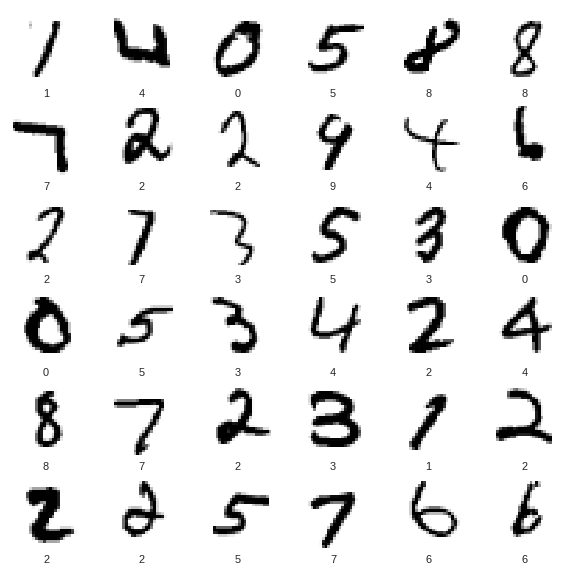

In [0]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(train_images.shape[0],36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

##Simple Model Manipulations

###Building the Model

####Defining building the model function

In [0]:
def build_fc_model():
  fc_model = tf.keras.Sequential()
  #Flattens the 2D image to be 1-Dimensional
  layer_flatten = tf.keras.layers.Flatten()#input_shape=(28, 28))
  layer_1 = tf.keras.layers.Dense(128)
  layer_2 = tf.keras.layers.Dense(10,  activation='softmax')  
  fc_model.add(layer_flatten)
  fc_model.add(layer_1)
  fc_model.add(layer_2)
  
  return fc_model

####Running the function

In [0]:
model = build_fc_model()
#print(model.summary())

###Compiling & fitting the model

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 41us/sample - loss: 0.4667 - acc: 0.8669 - val_loss: 0.3295 - val_acc: 0.9103
Epoch 2/10
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3372 - acc: 0.9099 - val_loss: 0.3079 - val_acc: 0.9185
Epoch 3/10
54000/54000 [==============================] - 2s 36us/sample - loss: 0.3098 - acc: 0.9149 - val_loss: 0.2916 - val_acc: 0.9215
Epoch 4/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2914 - acc: 0.9204 - val_loss: 0.2884 - val_acc: 0.9218
Epoch 5/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2786 - acc: 0.9223 - val_loss: 0.2784 - val_acc: 0.9247
Epoch 6/10
54000/54000 [==============================] - 2s 35us/sample - loss: 0.2706 - acc: 0.9251 - val_loss: 0.2763 - val_acc: 0.9250
Epoch 7/10
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2662 - acc: 0.9255 - val_loss: 0.2

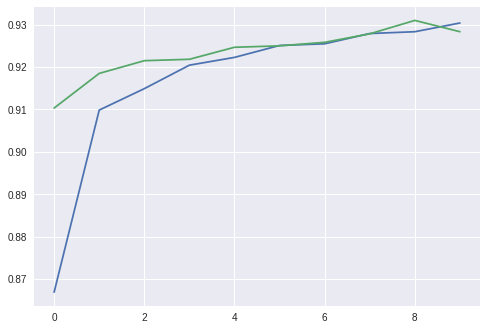

In [0]:
BATCH_SIZE = 160
EPOCHS = 10
optimize =tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.999, beta_2=0.999, epsilon=None, decay=0.0)
# TODO compile and fit the model with the appropriate parameters.
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimize)
hist = model.fit(train_images, train_labels, validation_data = (val_images, val_labels),verbose=1, batch_size=BATCH_SIZE, epochs=EPOCHS)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

###Evaluating the model

In [0]:
test_result = model.evaluate(test_images, test_labels, verbose=0)
print("Test Loss: {}\nTest Accuracy {}".format( test_result[0],test_result[1]))

Test Loss: 0.27227048588246106
Test Accuracy 0.9241999983787537


##CNN Model Manipulations

###Building the Model

####Defining building the model function

In [0]:
def build_cnn_model():
    cnn_model = tf.keras.models.Sequential()
    layer_conv_1 = tf.keras.layers.Conv2D(24,(3,3),input_shape=(28,28,1),padding='same',activation='tanh')
    layer_pool_1 =  tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    layer_conv_2 =  tf.keras.layers.Conv2D(36,(3,3),input_shape=(13,13,24),padding='same',activation='tanh')
    layer_pool_2 =  tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    layer_flatten =  tf.keras.layers.Flatten()
    layer_dense_1 =  tf.keras.layers.Dense(784)
    layer_dense_2 =  tf.keras.layers.Dense(128)
    layer_dense_3 =  tf.keras.layers.Dense(10, activation='softmax')
    cnn_model.add(layer_conv_1)
    cnn_model.add(layer_pool_1)
    cnn_model.add(layer_conv_2)
    cnn_model.add(layer_pool_2)
    cnn_model.add(layer_flatten)
    cnn_model.add(layer_dense_1)
    cnn_model.add(layer_dense_2)
    cnn_model.add(layer_dense_3)
    
    
    return cnn_model

####Running the function

In [0]:
cnn_model = build_cnn_model()
#print(cnn_model.summary())

###Compiling & fitting the model

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 71s 1ms/sample - loss: 0.1164 - acc: 0.9658 - val_loss: 0.0676 - val_acc: 0.9795
Epoch 2/10
54000/54000 [==============================] - 70s 1ms/sample - loss: 0.0662 - acc: 0.9797 - val_loss: 0.0632 - val_acc: 0.9818
Epoch 3/10
54000/54000 [==============================] - 71s 1ms/sample - loss: 0.0510 - acc: 0.9839 - val_loss: 0.0609 - val_acc: 0.9810
Epoch 4/10
54000/54000 [==============================] - 71s 1ms/sample - loss: 0.0404 - acc: 0.9868 - val_loss: 0.0669 - val_acc: 0.9817
Epoch 5/10
54000/54000 [==============================] - 71s 1ms/sample - loss: 0.0341 - acc: 0.9891 - val_loss: 0.0533 - val_acc: 0.9852
Epoch 6/10
54000/54000 [==============================] - 70s 1ms/sample - loss: 0.0281 - acc: 0.9908 - val_loss: 0.0559 - val_acc: 0.9847
Epoch 7/10
54000/54000 [==============================] - 71s 1ms/sample - loss: 0.0219 - acc: 0.9932 - val_loss: 0.0

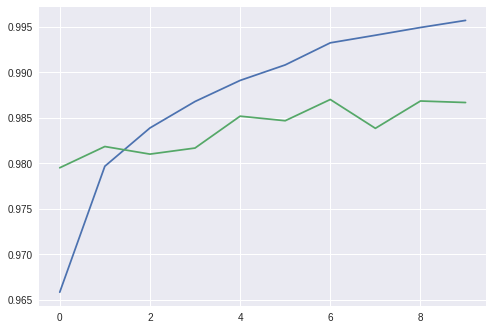

In [0]:
BATCH_SIZE = 160
EPOCHS = 10
optimize =tf.keras.optimizers.Adamax(lr=0.002, beta_1=0.999, beta_2=0.999, epsilon=None, decay=0.0)
# TODO compile and fit the model with the appropriate parameters.
cnn_model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimize)
hist = cnn_model.fit(train_images, train_labels, validation_data = (val_images, val_labels),verbose=1, batch_size=BATCH_SIZE, epochs=EPOCHS)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

###Evaluating the model

In [0]:
test_result = cnn_model.evaluate(test_images, test_labels, verbose=0)
print("Test Loss: {}\nTest Accuracy {}".format( test_result[0],test_result[1]))

Test Loss: 0.05630356174340413
Test Accuracy 0.9860000014305115


In [0]:
result = predict(test_image[0], batch_size=None, verbose=0, steps=None, callbacks=None)